# CRS

Coordinates Reference System

Les cartes de géographies tentent de représenter en 2D des points sur la terre : il faut pouvoir associer 2 coordonnées à tout point sur la surface de la terre.

Ce n'est pas simple du tout car la terre, ce n'est pas ça :

![terre sphere](https://upload.wikimedia.org/wikipedia/commons/d/d6/Sciences_de_la_terre.svg)

mais plutôt ça : 

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4a/Geoid_undulation_10k_scale.jpg" alt="terre biscornue" width="300px"/>

La façon classique de considérer la terre étant ça (un elllipsoïde) :

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/OblateSpheroid.PNG" alt="ellipsoïde" width="300px"/>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Représentation classique du monde

Le module [geodatasets](https://geodatasets.readthedocs.io/en/latest/index.html) contient quelques jeux de données, dont la terre.

In [2]:
import geodatasets

In [4]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [7]:
path = geodatasets.get_path('naturalearth land')
monde = gpd.read_file(path)

In [8]:
monde.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


In [9]:
# encodage du monde actuel (on y reviendra en détail plus tard)

monde.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

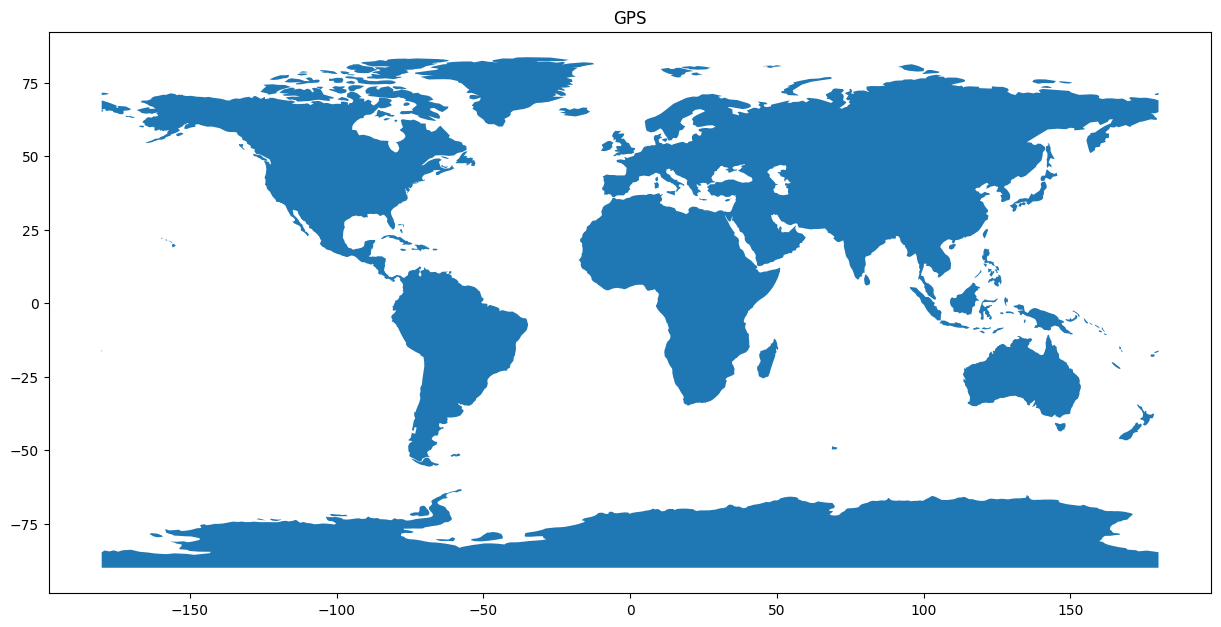

In [10]:
fig, ax = plt.subplots(figsize=(15, 15)) 

monde.plot(ax=ax)

ax.set_title("GPS");
plt.show()

### Mercator

Le premier à réaliser ce prodige a été [mercator](https://fr.wikipedia.org/wiki/Projection_de_Mercator) qui a projeté une sphère sur un cylindre avec l'équateur comme milieu :

Son système de coordonnées est [là](https://epsg.io/3395)

In [14]:
mercator = monde.to_crs(epsg=3395)

In [15]:
mercator.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
mercator

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-6631535.247 -15522373.983, -6664235..."
1,Land,1,1.0,"POLYGON ((-17722973.924 -15181985.733, -179366..."
2,Land,1,0.0,"POLYGON ((-5026604.629 -14352073.523, -4889244..."
3,Land,1,1.0,"POLYGON ((-13493203.727 -12275987.808, -133493..."
4,Land,1,1.0,"POLYGON ((-13977226.997 -12268299.276, -138071..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((5692454.249 15857208.900, 5543007.60..."
123,Land,0,0.0,"POLYGON ((11125243.193 14816317.763, 10882364...."
124,Land,0,0.0,"POLYGON ((-9687022.089 15282240.368, -9552809...."
125,Land,0,0.0,"POLYGON ((-7625385.119 17877288.371, -7327867...."


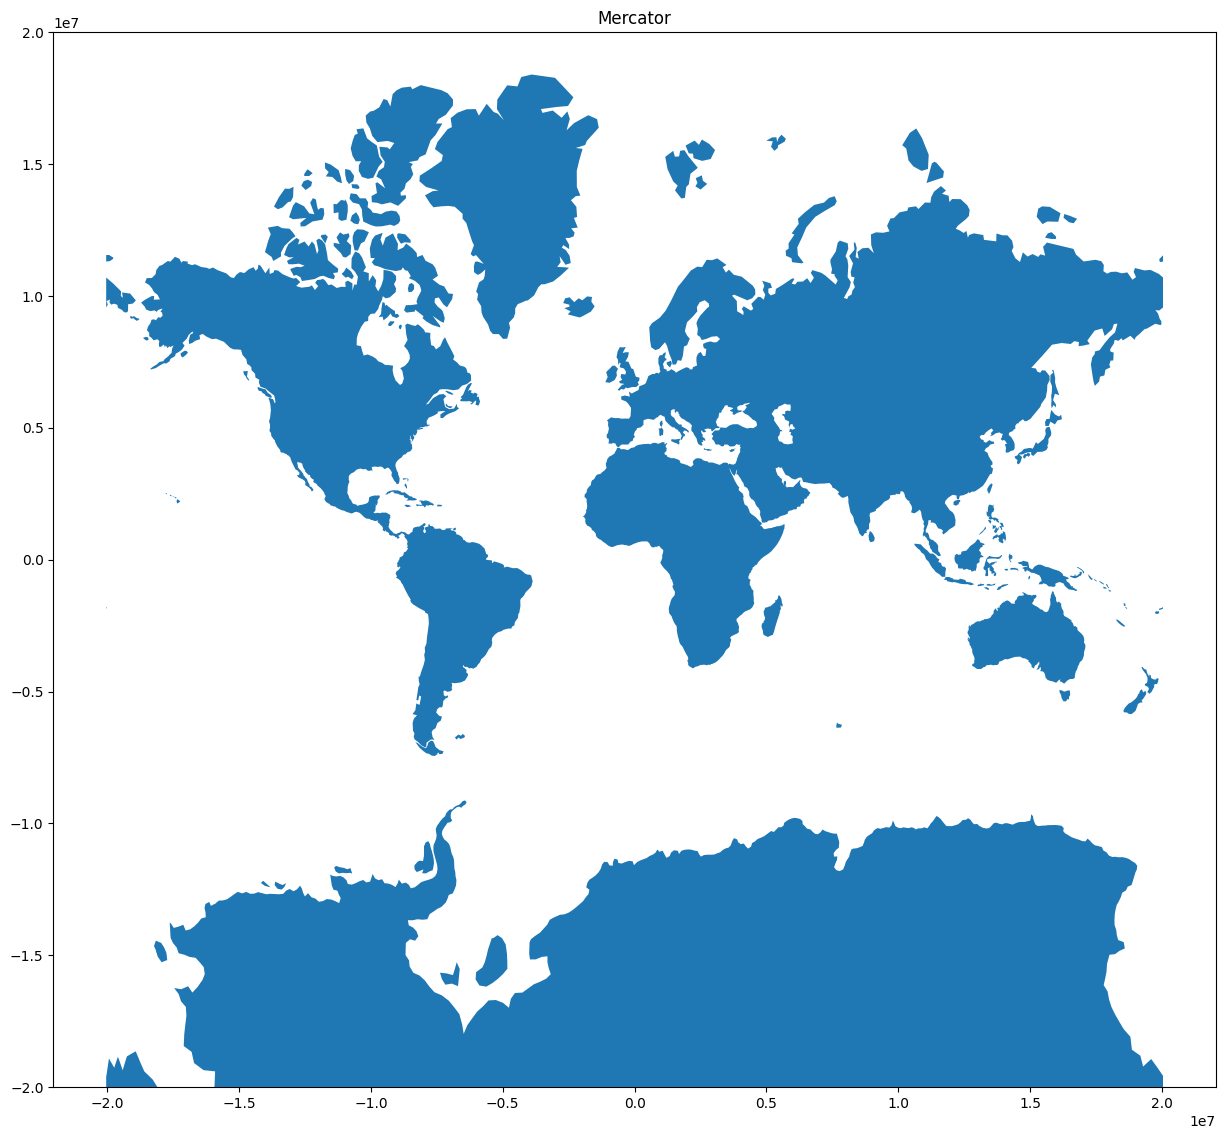

In [28]:
fig, ax = plt.subplots(figsize=(15, 25)) 

ax.set_ylim(-.2e8, .2e8)
mercator.plot(ax=ax)

ax.set_title("Mercator")
plt.show()

La projection de mercator déforme cependant énormément les contours loin de l'équateur, mais les angles sont conservés ce qui est crucial en navigation.

### GPS



In [29]:
gps = monde.to_crs(epsg=4326)

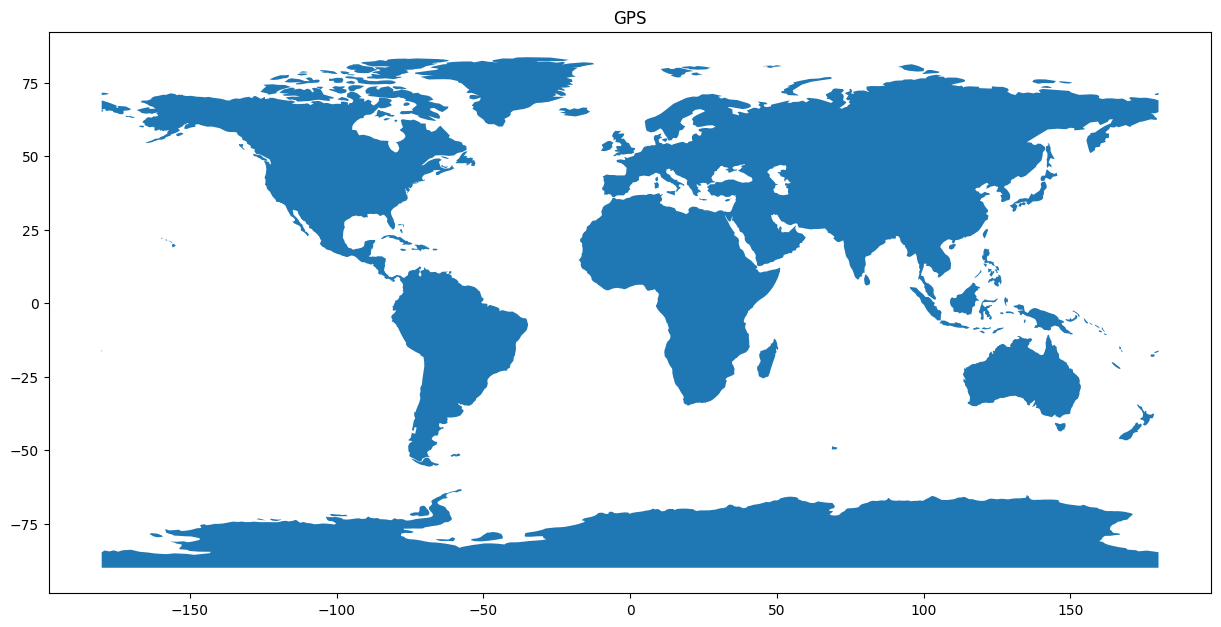

In [30]:
fig, ax = plt.subplots(figsize=(15, 15)) 

gps.plot(ax=ax)

ax.set_title("GPS");
plt.show()

Vous voyez qu'il y a des différences

### peters

Une dernière projection pour la route. Celle de [Peters](https://fr.wikipedia.org/wiki/Projection_de_Peters), souvent représentée la tête en bas. Elle respecte les surfaces.

Elle est définie [là](https://spatialreference.org/ref/sr-org/22/)


In [31]:
peters = monde.to_crs("+proj=cea +lon_0=0 +lat_ts=45 +x_0=0 +y_0=0 +ellps=WGS84 +units=m +no_defs +axis=wsu")

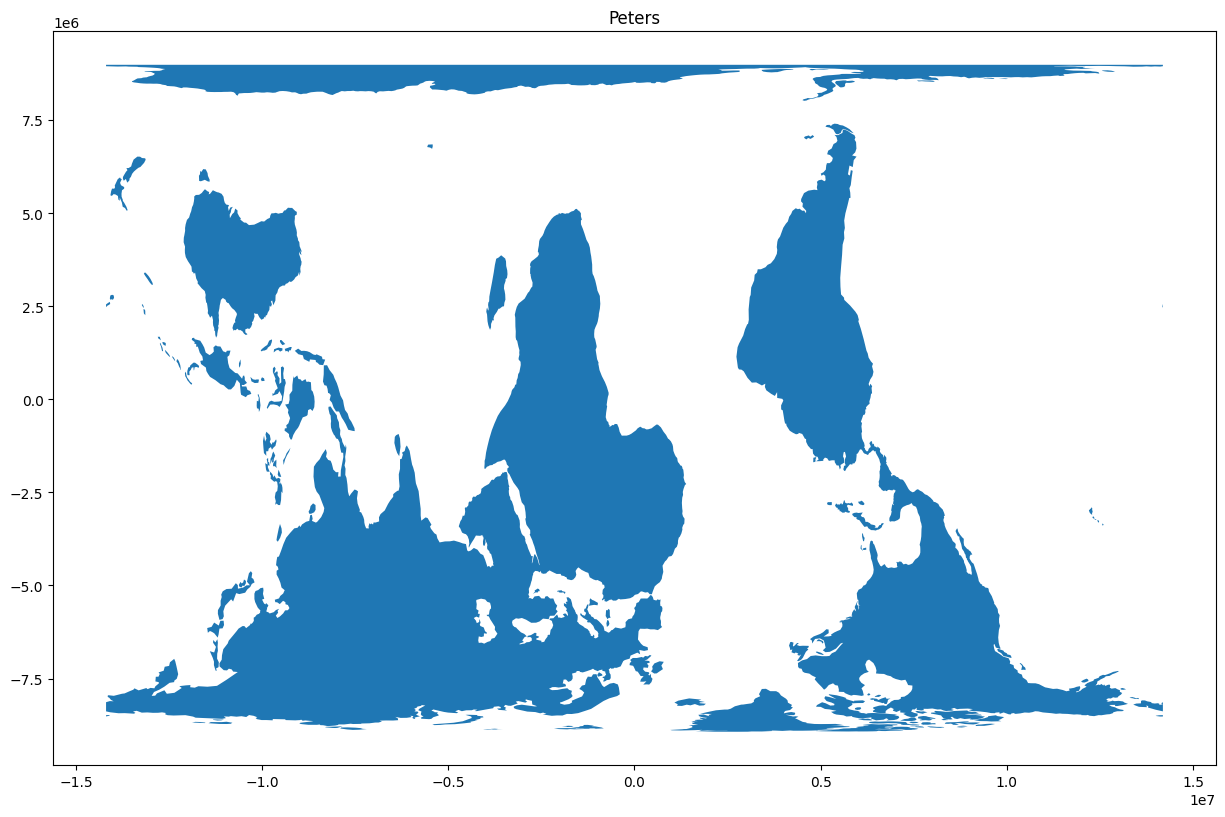

In [33]:
fig, ax = plt.subplots(figsize=(15, 15)) 

peters.plot(ax=ax)

ax.set_title("Peters");
plt.show()

### conclusions

Tout est faux. Chaque système de coordonnées a des soucis quelquepart. Il faut donc utiliser celui qui en a le moins à l'endroit où l'on regarde.

http://metrocosm.com/compare-map-projections.html

## tutos 

* une [introduction aux systèmes de coordonnées](https://medium.com/@_FrancoisM/introduction-%C3%A0-la-manipulation-de-donn%C3%A9es-cartographiques-23b4e38d8f0f) avec une vidéo éclairante.
* un [autre tuto](
https://medium.com/cr%C3%A9ation-dune-app-cartographique-avec-firebase-vue/comprendre-les-coordinates-reference-system-crs-b67a88bce63c) très bien fait en français (avec de vrais morceaux de lol dedans en plus).
* [super vidéo](https://www.youtube.com/watch?v=xJyJlKbZFlc&list=PLewNEVDy7gq3DjrPDxGFLbHE4G2QWe8Qh&index=8) vous expliquant très bien tout ça (mais passez le en x1.5 sinon vous allez vous endormir). Toute la playlist est bien d'ailleurs.
* [un grop pdf](https://pubs.usgs.gov/bul/1532/report.pdf)

Les sites de références qui recencent les différentes projections :

* https://epsg.io/
* https://spatialreference.org/

### conclusion

Lorsque vous chargez des donnes il est **CRITIQUE** que vous leurs associez leur CRS, sinon aucune conversion ne sera possible.

Lorsque vous allez faire des calculs ou des graphiques, il est indispensable que toutes vos données géographiques soient avec le même système de coordonnées (CRS).

Si vous voulez créer les votres (on fera un essai ci-après), vous pouvez lire la doc :
* de geopandas : https://geopandas.org/projections.html
* des différents paramètres que l'on peut utiliser : https://proj.org/usage/projections.html

## Rotation de carte

On va montrer comment faire une rotation de carte pour expliciter qu'une carte c'est :
1. toujours pour que quelqu'un la regarde
2. elle doit avoir un but

exemple : 

* mercator pour les marins (elle respecte les angles)
* Peters qui respecte les surfaces réelle des pays (l'afrique, c'est grand !)

Surtout, son centre n'est qu'une convention :
    * carte européenne (greenwich)
    * carte américaine (centrée sur le milieu des USA)
    * carte chinoise (centrée sur le pacifique)

On va essayer de le voir en déplaçant le centre de la carte. Commençons par toruver notre carte avec le méridien de greenwitch en 0 :

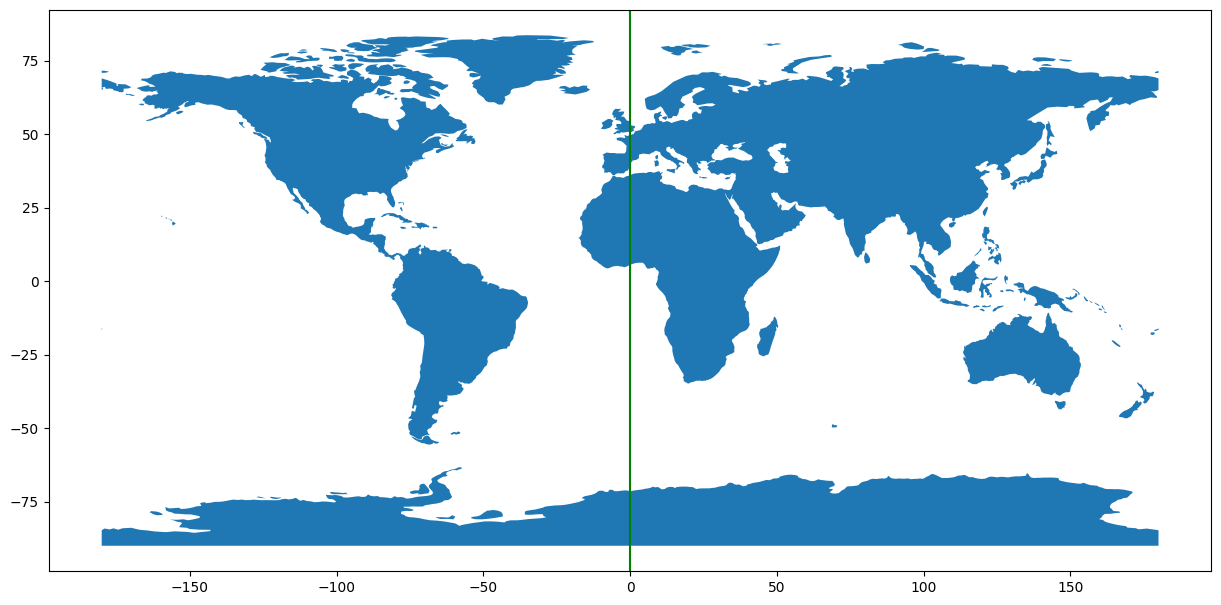

In [34]:
fig, ax = plt.subplots(figsize=(15, 15)) 

(monde
     .plot(ax=ax)
)
ax.axvline(x=0, color="green")

plt.show()

Ses paramètres de projections sont :

In [40]:
monde.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

En [lisant la doc](https://proj.org/usage/projections.html) des paramètres de projection, on doit toucher au paramètre `pm` pour changer le centre vertical. 

On veut centrer la carte pour les USA, donc une longitude de -100 environ.

Sauf que si on change de repère sans faire attention : 

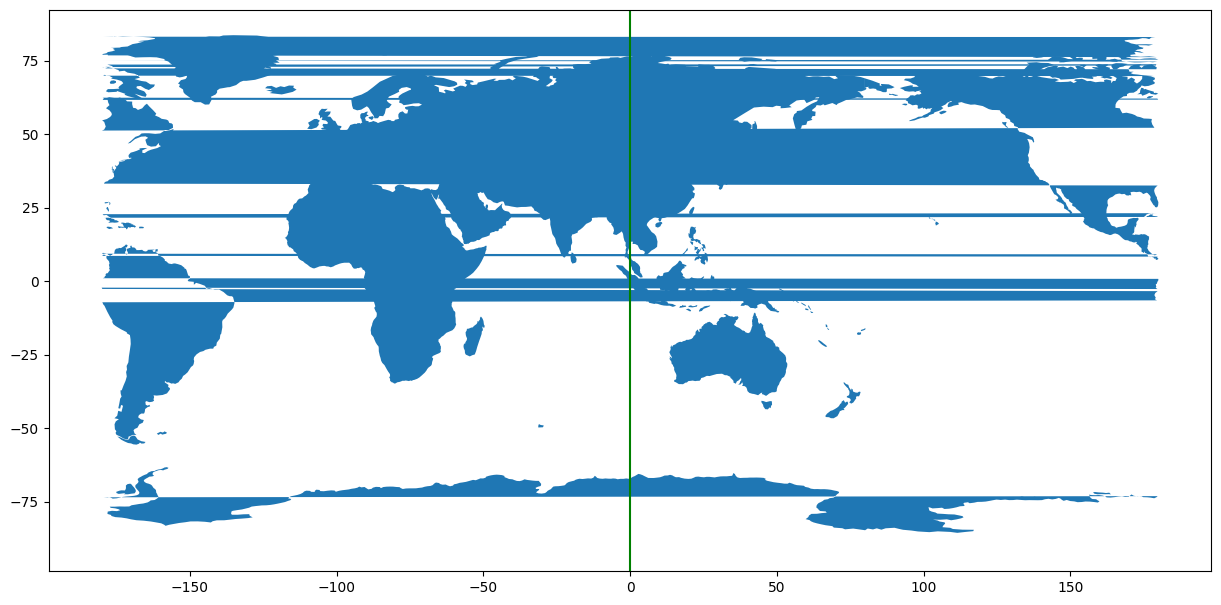

In [42]:
fig, ax = plt.subplots(figsize=(15, 15)) 

(monde
     .to_crs("+proj=longlat +pm=100 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
     .plot(ax=ax)
)
ax.axvline(x=0, color="green")
plt.show()

C'est la catastrophe. 

Tous les pays qui chevauchent les nouveaux bords sont détruits : ils ont des bords à gauche et à droite de la figure... 

Pour palier ça, il faut découper la carte pour que chaque région soit toujours d'un côté de la carte. Pour que l'on puisse faire plusieurs essais, on va découper la carte en tronçons de 10 de longitude.

### découpage en tronçons

on va créer des petites bandes de .02 de largeur sur toute la carte et les soustraire à notre carte. Ceci découpera nos pays par tronçons de 10 de longitude.

In [43]:
from shapely.geometry import Polygon

In [44]:
bandes = []
delta = .01
for pm in range(-180, 180, 10):
    bandes.append(Polygon([(pm - delta, -100), (pm - delta, 100), (pm + delta,100), (pm + delta, -100)]))


meridiens = gpd.GeoDataFrame({'geometry': gpd.GeoSeries(bandes)}, 
                             crs=monde.crs)

découpage avec la fonction [overlay](https://geopandas.org/set_operations.html) de geopandas  qui est ultra puissante (on y reviendra) :

In [45]:
monde_découpé = gpd.overlay(monde, meridiens, how='difference')

En dessinant, on voit bien les nouveaux bords :

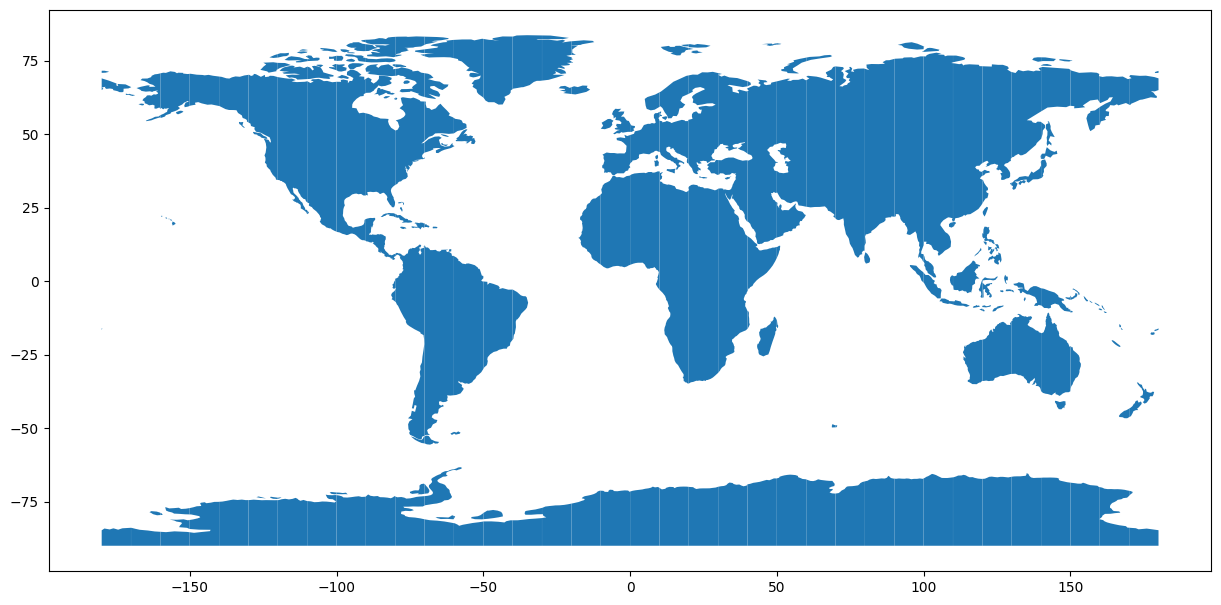

In [48]:
fig, ax = plt.subplots(figsize=(15, 15)) 

monde_découpé.plot(ax=ax)

plt.show()

On voit bien les découpages. 

Pour bien faire on ne devrait faire que les découpages nécessaires pour la rotation, histoire de ne pas dénaturer les pays plus que ça.

**Note** : un bout de la sibérie est déjà découpée par défaut dans cette carte.

#### carte USA :

On centre en -100 (paramètre `+pm=-100`)

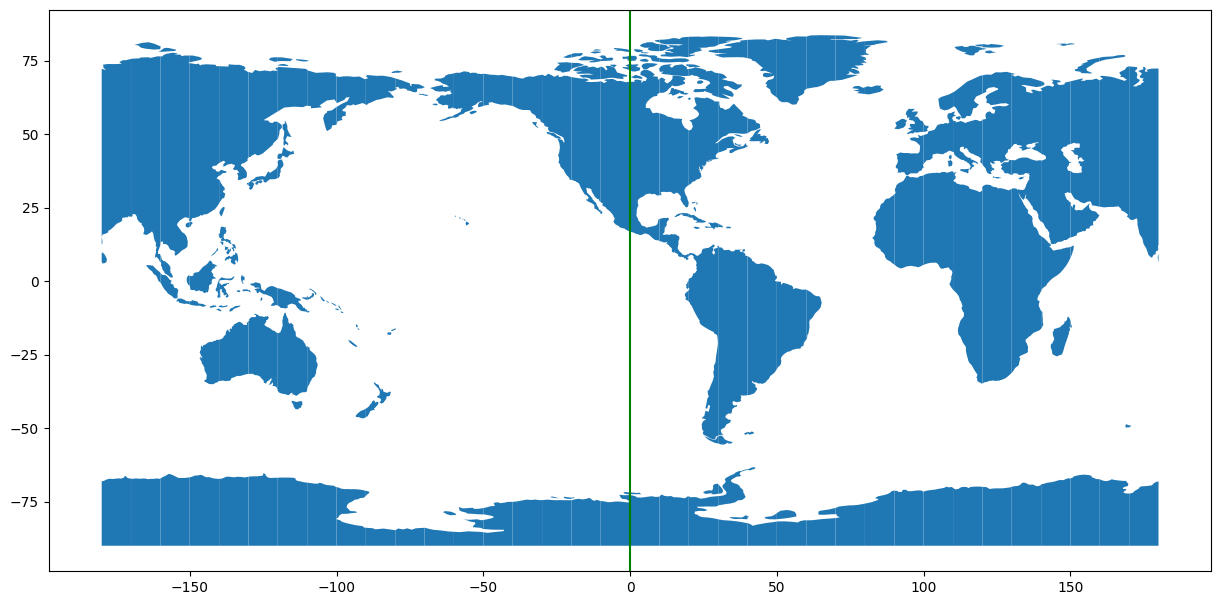

In [49]:
fig, ax = plt.subplots(figsize=(15, 15)) 

(monde_découpé
     .to_crs("+proj=longlat +pm=-100 +x_0=0 +y_0=0 +ellps=WGS84 +units=m +no_defs")
     .plot(ax=ax)
)
ax.axvline(x=0, color="green")

plt.show()

#### carte chine

On centre en +110 (paramètre `+pm=-110`)

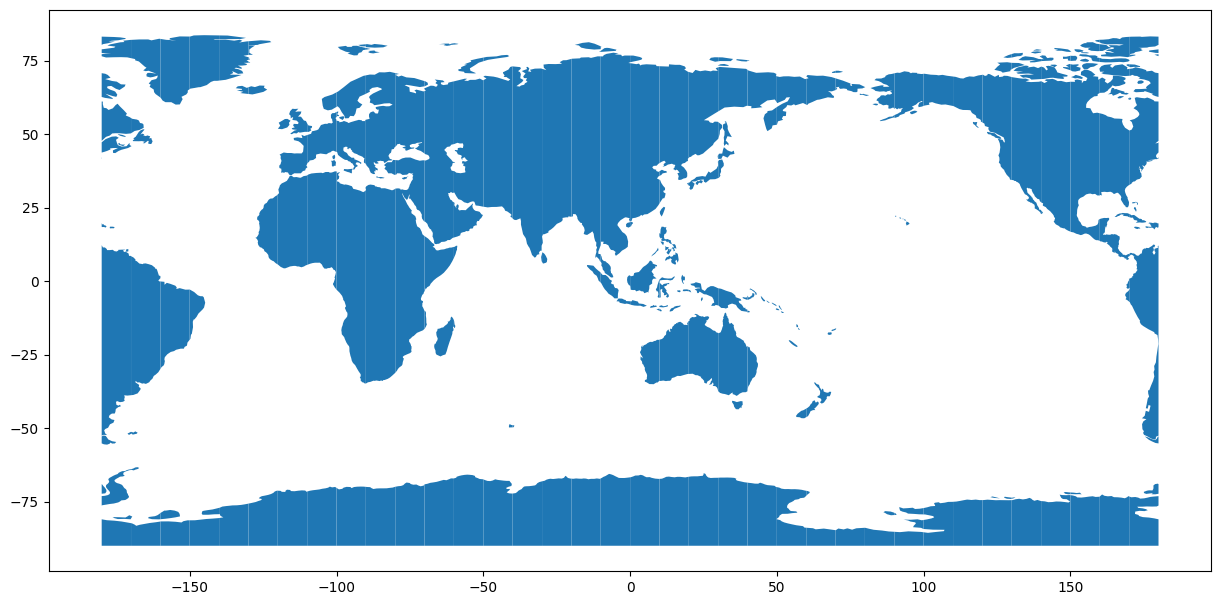

In [50]:
fig, ax = plt.subplots(figsize=(15, 15)) 

(monde_découpé
     .to_crs("+proj=longlat +pm=110 +x_0=0 +y_0=0 +ellps=WGS84 +units=m +no_defs")
     .plot(ax=ax)
)

plt.show()

## Cartopy

<https://scitools.org.uk/>